## Multiple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
#rearrange the columns
cars=pd.DataFrame(cars, columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of columns
- hp = horse power=x1
- mpg = milege (miles per gallon)=y
- vol= volume (size)=x2
- wt = weight of the car(pounds)=x4
- sp = speed(miles per hour) =x3
- y=f(x1,x2,x3,x4)
- x's are independent
- y is dependent

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.describe()

,HP,VOL,SP,WT,MPG
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,98.765432,121.540272,32.412577,34.422076
std,57.113502,22.301497,14.181432,7.492813,9.131445
min,49.000000,50.000000,99.564907,15.712859,12.101263
25%,84.000000,89.000000,113.829145,29.591768,27.856252
50%,100.000000,101.000000,118.208698,32.734518,35.152727
75%,140.000000,113.000000,126.404312,37.392524,39.531633
max,322.000000,160.000000,169.598513,52.997752,53.700681


In [6]:
#check for missing values
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### observations about info and missing values

- There are no missing values
- There aare 81 observations (81 different ccars data)
- The data types of the ccols are also relevant and valid

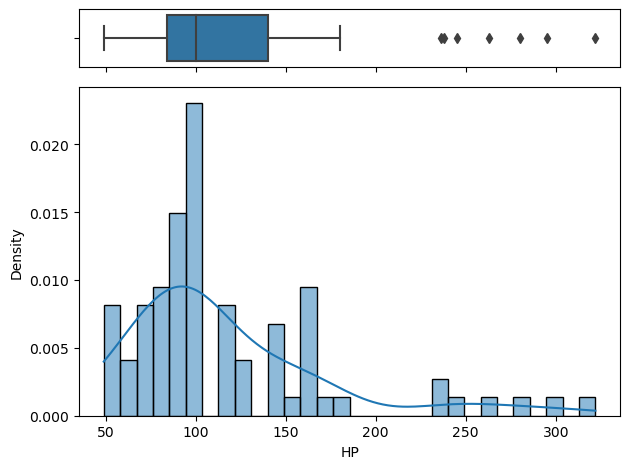

In [7]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

#### Observations
There are 7 data points and right skewed

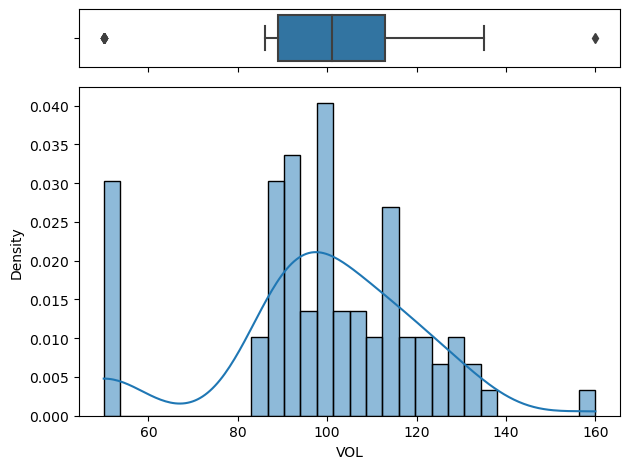

In [8]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

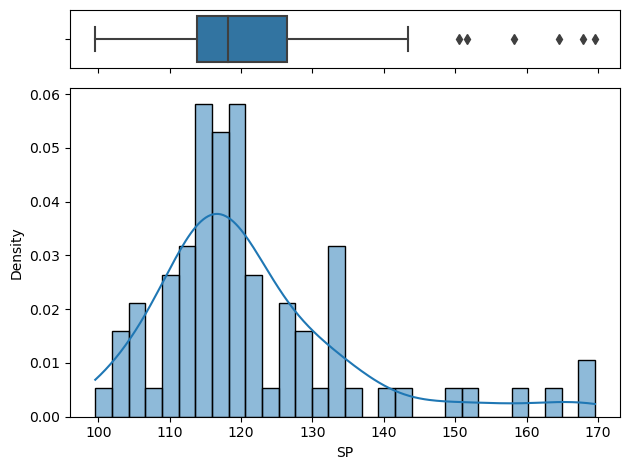

In [9]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

#### Observations
- In above graph six outliers are present and it is right skewed

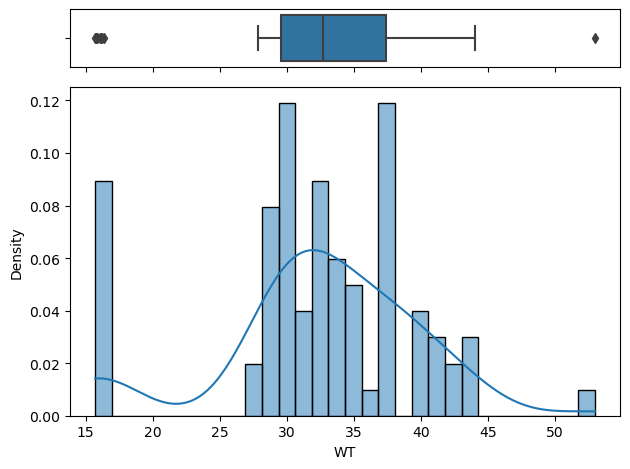

In [10]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

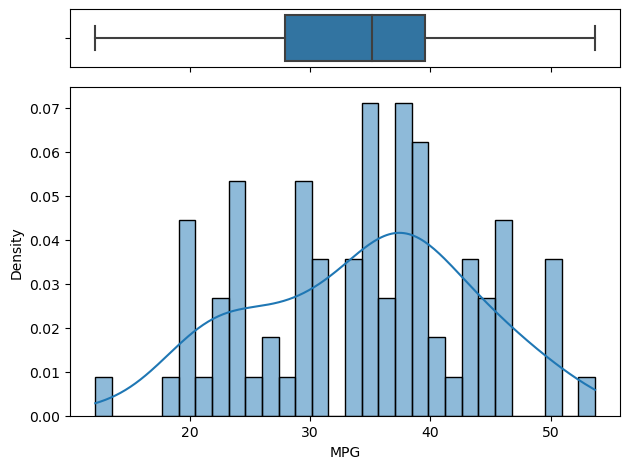

In [11]:
#Create a figure with two subplots9one above the other)
fig, (ax_box, ax_hist) =  plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15, .85)})

#creating a boxplot
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='') #remove x label for the boxplot

#creating a histogram in the same x - axizs
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat='density')
ax_hist.set(ylabel='Density')

#adjust layout
plt.tight_layout()
plt.show()

In [12]:
#.There are some exterme values (outliers) observed in towards the right tail of SP and HP distributions.
#.In VOL and WT cols, a few outliers are observedd in both tails of their distributions.
#.The extreme values of cars data may have come from the specially designed nature of cars.
#.As this is multi-dimensional data, the outliers with respect to spatial dimensions may have tobe considered while building the regression model

In [13]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


C:\Users\Spoorthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


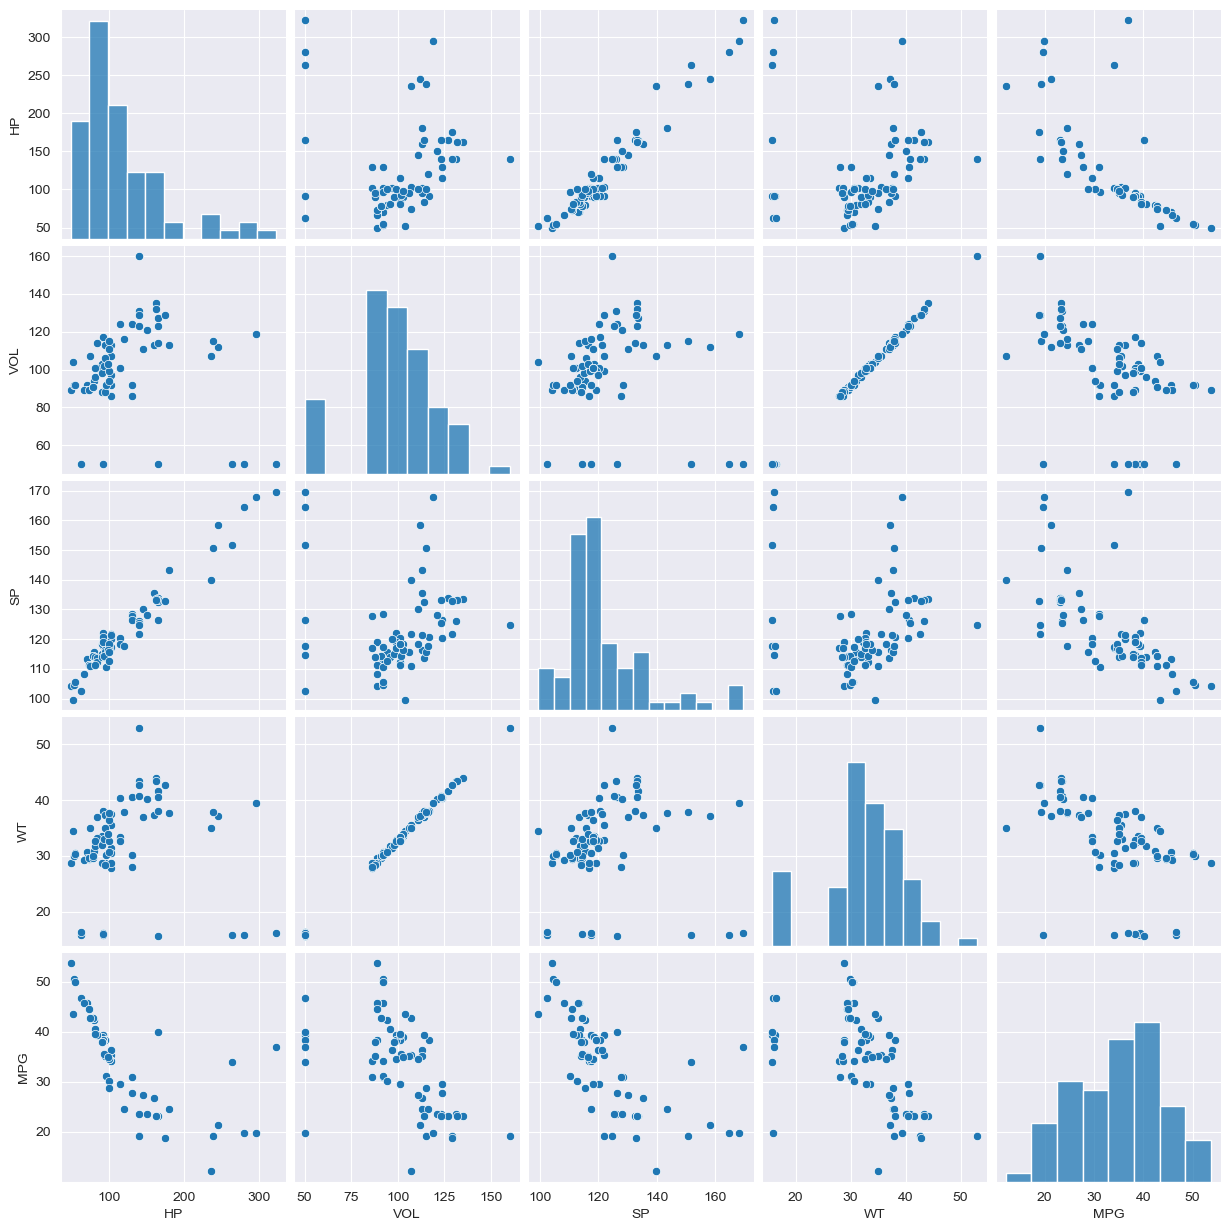

In [14]:
#pair plot
sns.set_style(style="darkgrid")
sns.pairplot(cars)

In [15]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#### observations
- The highest correlation is observed blw wt and vol (0.999203)
- The second highest correlation is observed blw hp and sp (0.973848)
- The next highest correlation is obsrved blw Hp and Vol (0.077459)

#### Observations from correlation plots and coeffcients
- Between x and y, all the variables are showing moderate to high correlation strengths, highest being between HP and MPG
- Therefore this dataset qualifies for building a multiple linear regression model to predict MPG.
- Among X columns(x1,x2,x3 and x4), some very high correlation strengths are observed between SP vs HP, VOL vs WT
- The high correlation among x columns is not desirable as it might lead to multicollinearity problem

#### Preparing a preliminary model considering all x columns

In [16]:
#build model
#import statsmodels.formula.api as smf
model1=smf.ols("MPG~WT+VOL+SP+HP",data=cars).fit()

In [17]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:26:52   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-square = The amount of variance in 'y' that is explained (captured) by x-columns.
- y_hat=bo+b1x1+b2x2+b3x3+b4x4......bnxn, 
  where betas are model params of coeficient.

#### Observations from model summary
- The R-squared and adjusted R_squared values are good and about 75% of variability in Y is explained by x columns.
- The probability value with respect t f-statistic is close to zero, indicating that all or some of x columns are significant.
- The p-values for VOL and WT are higher that 5% indicating some interaction issue among themselves, which need to be further explored.

- y_hat value=by using predict method on x data 
- resuidal = y-y_hat
- mean square error=sqauring every error
- every data point has actual value and predict value 

#### Performance metrics for model1

In [18]:
# find the metrices
#create a data frame with actual y and predicted y columns
df1=pd.DataFrame()
df1['actual_y1']=cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [19]:
#predict foe the given x data columns
pred_y1=model1.predict(cars.iloc[:,0:4])
df1["pred_y1"]=pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [20]:
#compute the Mean squared error(MSE),RMSE for model1
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df1["actual_y1"],df1["pred_y1"])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.897141152343096
RMSE : 4.347084212704315


### Checking for multicollinearity among x-columns using VIF method

In [21]:
# Compute VIF values x vs x
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


**Observations for VIF values:**
- The ideal range of VIF values shall be between 0 to 10.HOwever slightly higher values can be tolerated
- As seen from the very high VIF values for VOL and WT, it is clear that they are prone to multicollinearity problem
- Hence itithe is decided to drop one of the columns(either VOL or WT) to overcome the multicollinearity
- It is decided to drop WT and retain VOL column in further models

In [22]:
cars1=cars.drop("WT",axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [23]:
model2=smf.ols("MPG~HP+VOL+SP",data=cars1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:26:53   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### performance metrics for model2

In [24]:
df2=pd.DataFrame()
df2["actual_y2"]=cars["MPG"]
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [25]:
#predict for the given x data columns
pred_y2=model2.predict(cars1.iloc[:,0:4])
df2["pred_y2"]=pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.590769
1,50.013401,42.256794
2,50.013401,42.256794
3,45.696322,42.361497
4,50.504232,42.269544


In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df2["actual_y2"],df2["pred_y2"])
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.911053388711224
RMSE : 4.34868409851891


#### Observations for model2 summary()
- The adjusted R-squared value improved slightly to 0.76
- All the p-values for model parameters are less than 5% hence they are significant
- Therefore the HP, VOL, SP  columns are finalized as the significant predictor for the MPG response variable 
- There is no improvement in MSE value


#### Identification of influence data points(spatial Operation)

#### Leverage (Hat values):
Leverage values diagnose if a data point has an extreme value in terms of the independent variables. A point with high leverage has a great ability to influence the regression line. The threshold for considering a point as having high leverage is typically set at 3(k+1)/n, where k is the number of predictors and n is the sample size.

In [27]:
#Define variables and assign values
k=3  #no of x-columns in cars1
n=81 #no of observations (rows)
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.14814814814814814

<function matplotlib.pyplot.show(close=None, block=None)>

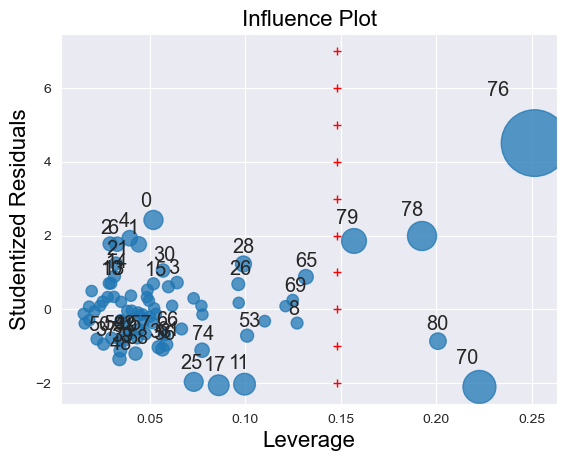

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show

- it is a error distribution graph
- the numbers appearing on the blue points are indexes
- the points which are crossed the red points are called leverage we can treat it as ouliers record.
#### Observations
- From the above plot , it is evident that data points 65,70,76,78,79,80 are the influencers
- as their H Leverage values are higher and size is higher


In [29]:
cars1[cars1.index.isin([65,70,76,78,79,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [30]:
#Discard the data points which are influencers and reassign the row number(reset_index)
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)

In [31]:
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


### Build Model3 on cars2 dataset

In [32]:
#rebuild the model  model
model3=smf.ols('MPG~VOL+SP+HP',data=cars2).fit()

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.60e-33
Time:                        12:26:53   Log-Likelihood:                -187.46
No. Observations:                  75   AIC:                             382.9
Df Residuals:                      71   BIC:                             392.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6816     11.600      0.404      0.688     -18.448      27.811
VOL           -0.0952      0.021     -4.451      0.000      -0.138      -0.053
SP             0.6342      0.124      5.134      0.000       0.388       0.881
HP            -0.3350      0.034     -9.937      0.000      -0.402      -0.268
==============================================================================
Omnibus:                       20.724   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.198
Skew:                           1.233   Prob(JB):                     1.24e-06
Kurtosis:                       4.619   Cond. No.                     6.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Performance Metrics for model3

In [45]:
df3=pd.DataFrame()
df3["actual_y3"]=cars2["MPG"]
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [46]:
pred_y3=model3.predict(cars2.iloc[:,0:3])
df3["pred_y3"]=pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.872002
1,50.013401,44.385430
2,50.013401,44.385430
3,45.696322,44.433742
4,50.504232,44.421272


In [47]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df3["actual_y3"],df3["pred_y3"])
print("MSE :", mse)
print("RMSE :",np.sqrt(mse))

MSE : 8.681197361563033
RMSE : 2.9463871710220015


#### Comparison of models
                     

| Metric         | Model 1 | Model 2 | Model 3 |
|----------------|---------|---------|---------|
| R-squared      | 0.771   | 0.770   | 0.885   |
| Adj. R-squared | 0.758   | 0.761   | 0.880   |
| MSE            | 18.89   | 18.91   | 8.68    |
| RMSE           | 4.34    | 4.34    | 2.94    |


- **From the above comparison table it is observed that model3 is the best among all with superior performance metrics**